In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint


from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.preprocessing import LabelBinarizer

In [2]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Checking the shape of the data
print(X_train[0].shape)

(28, 28)


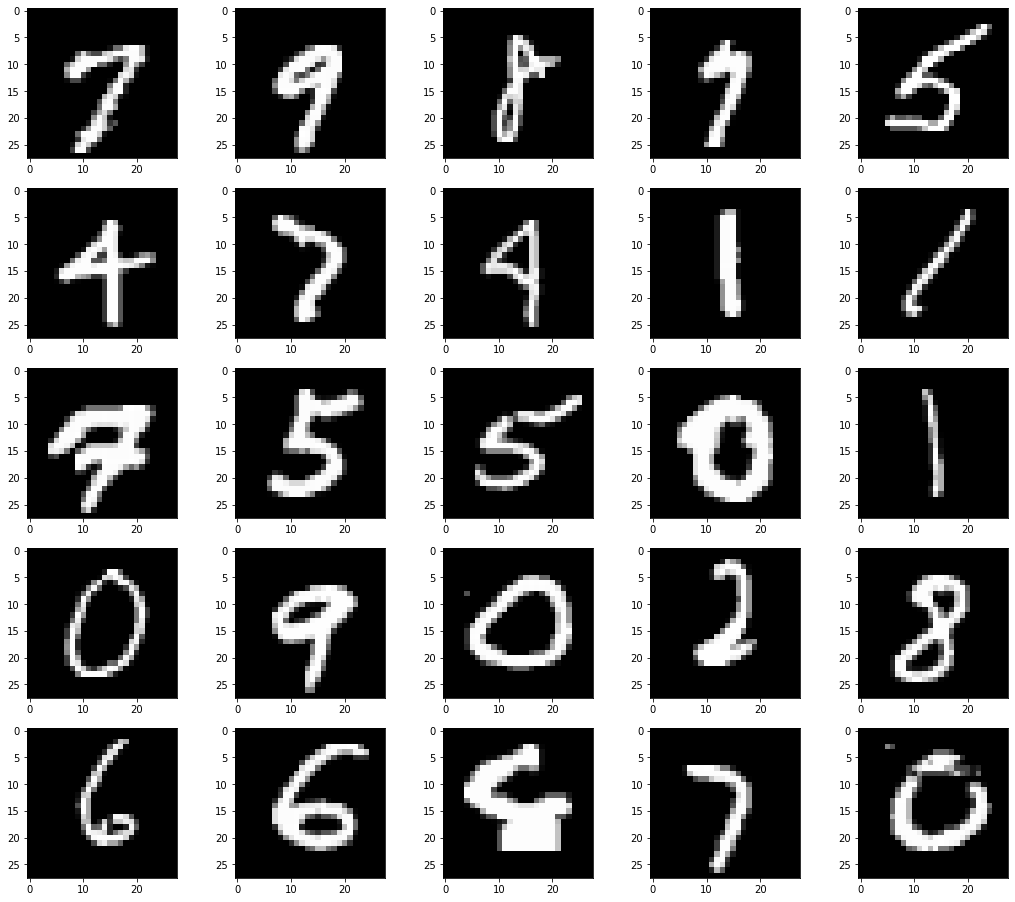

In [4]:
# Plotting the data
nums = []
for i in np.arange(0,25):
    nums.append(f"ax{i}")
fig, ((nums[0:5]),(nums[5:10]), (nums[10:15]), (nums[15:20]), (nums[20:25])) = plt.subplots(5, 5,figsize=(18,16))
for i in nums:
    i.imshow(X_train[np.random.randint(0,len(X_train))], cmap = 'gray')
plt.show()

In [5]:
# Building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Hot Encoding the Label Data
lb = LabelBinarizer()
y_test = lb.fit_transform(y_test)
y_train = lb.fit_transform(y_train)
y_classes = lb.classes_

In [6]:
# Building a linear stack of layers with the sequential model
model = Sequential()

# Convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# Flatten output of conv
model.add(Flatten())
# Adding hidden layer
model.add(Dense(50, activation='relu'))
# Output layer
model.add(Dense(10, activation='softmax'))

# Compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Early stopping
callbacks = [EarlyStopping(monitor='val_loss', patience=10),
         ModelCheckpoint(filepath='best_model_MNIST.h5', monitor='val_loss', save_best_only=True)]


In [7]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 25)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16900)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                845050    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 845,810
Trainable params: 845,810
Non-trainable params: 0
_________________________________________________________________


In [8]:
# training the model for 10 epochs
history = model.fit(X_train, y_train, batch_size=128, callbacks=callbacks, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
469/469 [==============================] - 23s 47ms/step - loss: 4.6491 - accuracy: 0.6460 - val_loss: 0.4312 - val_accuracy: 0.9132
Epoch 2/200
469/469 [==============================] - 21s 44ms/step - loss: 0.3402 - accuracy: 0.9196 - val_loss: 0.2356 - val_accuracy: 0.9468
Epoch 3/200
469/469 [==============================] - 20s 44ms/step - loss: 0.1765 - accuracy: 0.9575 - val_loss: 0.1869 - val_accuracy: 0.9540
Epoch 4/200
469/469 [==============================] - 20s 44ms/step - loss: 0.1117 - accuracy: 0.9691 - val_loss: 0.1557 - val_accuracy: 0.9666
Epoch 5/200
469/469 [==============================] - 20s 43ms/step - loss: 0.0784 - accuracy: 0.9777 - val_loss: 0.1511 - val_accuracy: 0.9686
Epoch 6/200
469/469 [==============================] - 21s 44ms/step - loss: 0.0575 - accuracy: 0.9834 - val_loss: 0.1508 - val_accuracy: 0.9693
Epoch 7/200
469/469 [==============================] - 22s 48ms/step - loss: 0.0484 - accuracy: 0.9867 - val_loss: 0.1433 - val_ac

In [9]:
# Predicting the test data
y_pred = model.predict(X_test).round()

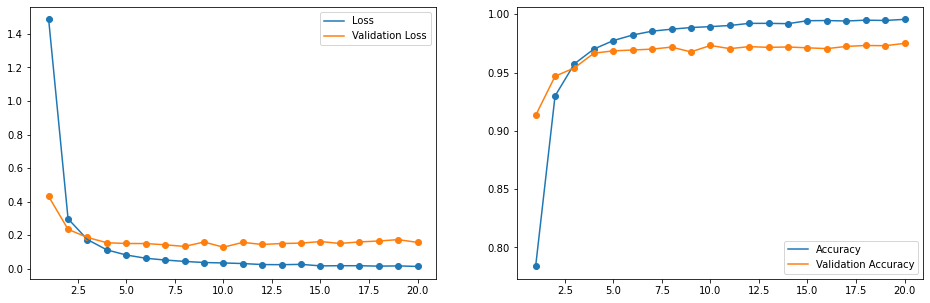

In [10]:
# Plotting the losses and accuraccy for the test and train sets
epochs = len(history.history['loss'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))

ax1.plot(np.arange(1,epochs+ 1),history.history['loss'], label = 'Loss') 
ax1.plot(np.arange(1,epochs+ 1),history.history['val_loss'], label = 'Validation Loss')
ax1.scatter(np.arange(1,epochs+ 1),history.history['loss']) 
ax1.scatter(np.arange(1,epochs+ 1),history.history['val_loss'])

ax2.plot(np.arange(1,epochs+ 1),history.history['accuracy'], label = 'Accuracy') 
ax2.plot(np.arange(1,epochs+ 1),history.history['val_accuracy'], label = 'Validation Accuracy')

ax2.scatter(np.arange(1,epochs+ 1),history.history['accuracy']) 
ax2.scatter(np.arange(1,epochs+ 1),history.history['val_accuracy'])

ax1.legend()
ax2.legend()
plt.show()

In [11]:
# Recall, Accuracy, and Precision
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred,average='macro')*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')*100:.2f}%")

Accuracy: 97.42%
Precision: 97.64%
Recall: 97.41%


In [12]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [13]:
# Confusion Matrix
matrix

array([[ 971,    0,    3,    0,    0,    0,    3,    1,    1,    1],
       [   1, 1122,    4,    1,    0,    0,    3,    2,    2,    0],
       [   8,    3, 1012,    1,    0,    0,    2,    3,    2,    1],
       [   2,    2,    2,  986,    0,   10,    0,    3,    4,    1],
       [   0,    2,    3,    1,  956,    0,    6,    0,    1,   13],
       [   3,    0,    1,    6,    0,  877,    3,    0,    1,    1],
       [   6,    2,    0,    1,    6,    8,  930,    0,    5,    0],
       [   2,    5,   13,    8,    0,    1,    0,  990,    2,    7],
       [  11,   10,    3,    0,    2,    2,    1,    2,  936,    7],
       [   4,    4,    2,    8,    8,    6,    0,    6,    8,  963]],
      dtype=int64)

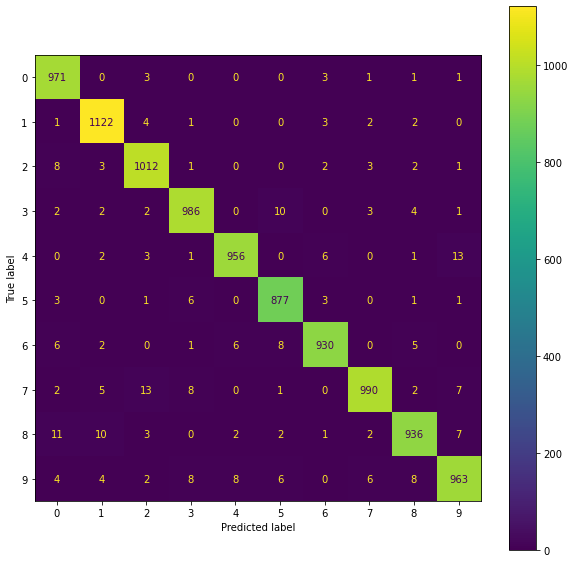

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
fig = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=y_classes)
fig.plot(ax=ax)
plt.show()